In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df= pd.read_csv("pima-indians-diabetes-2.data", names= colnames)

In [55]:
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [56]:
df.shape

(768, 9)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
df.isnull().sum().sort_values(ascending=False)

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

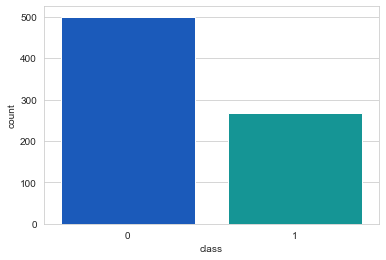

In [59]:
sns.set_style('whitegrid')
sns.countplot(x='class',data=df,palette='winter')

In [60]:
df.groupby(["class"]).count()

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


<AxesSubplot:xlabel='preg', ylabel='count'>

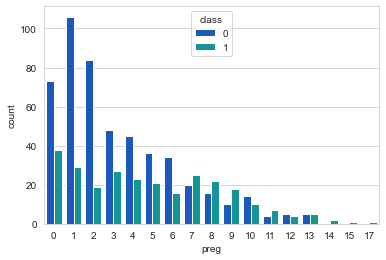

In [61]:
sns.set_style('whitegrid')
sns.countplot(x='preg',hue="class",data=df,palette='winter')

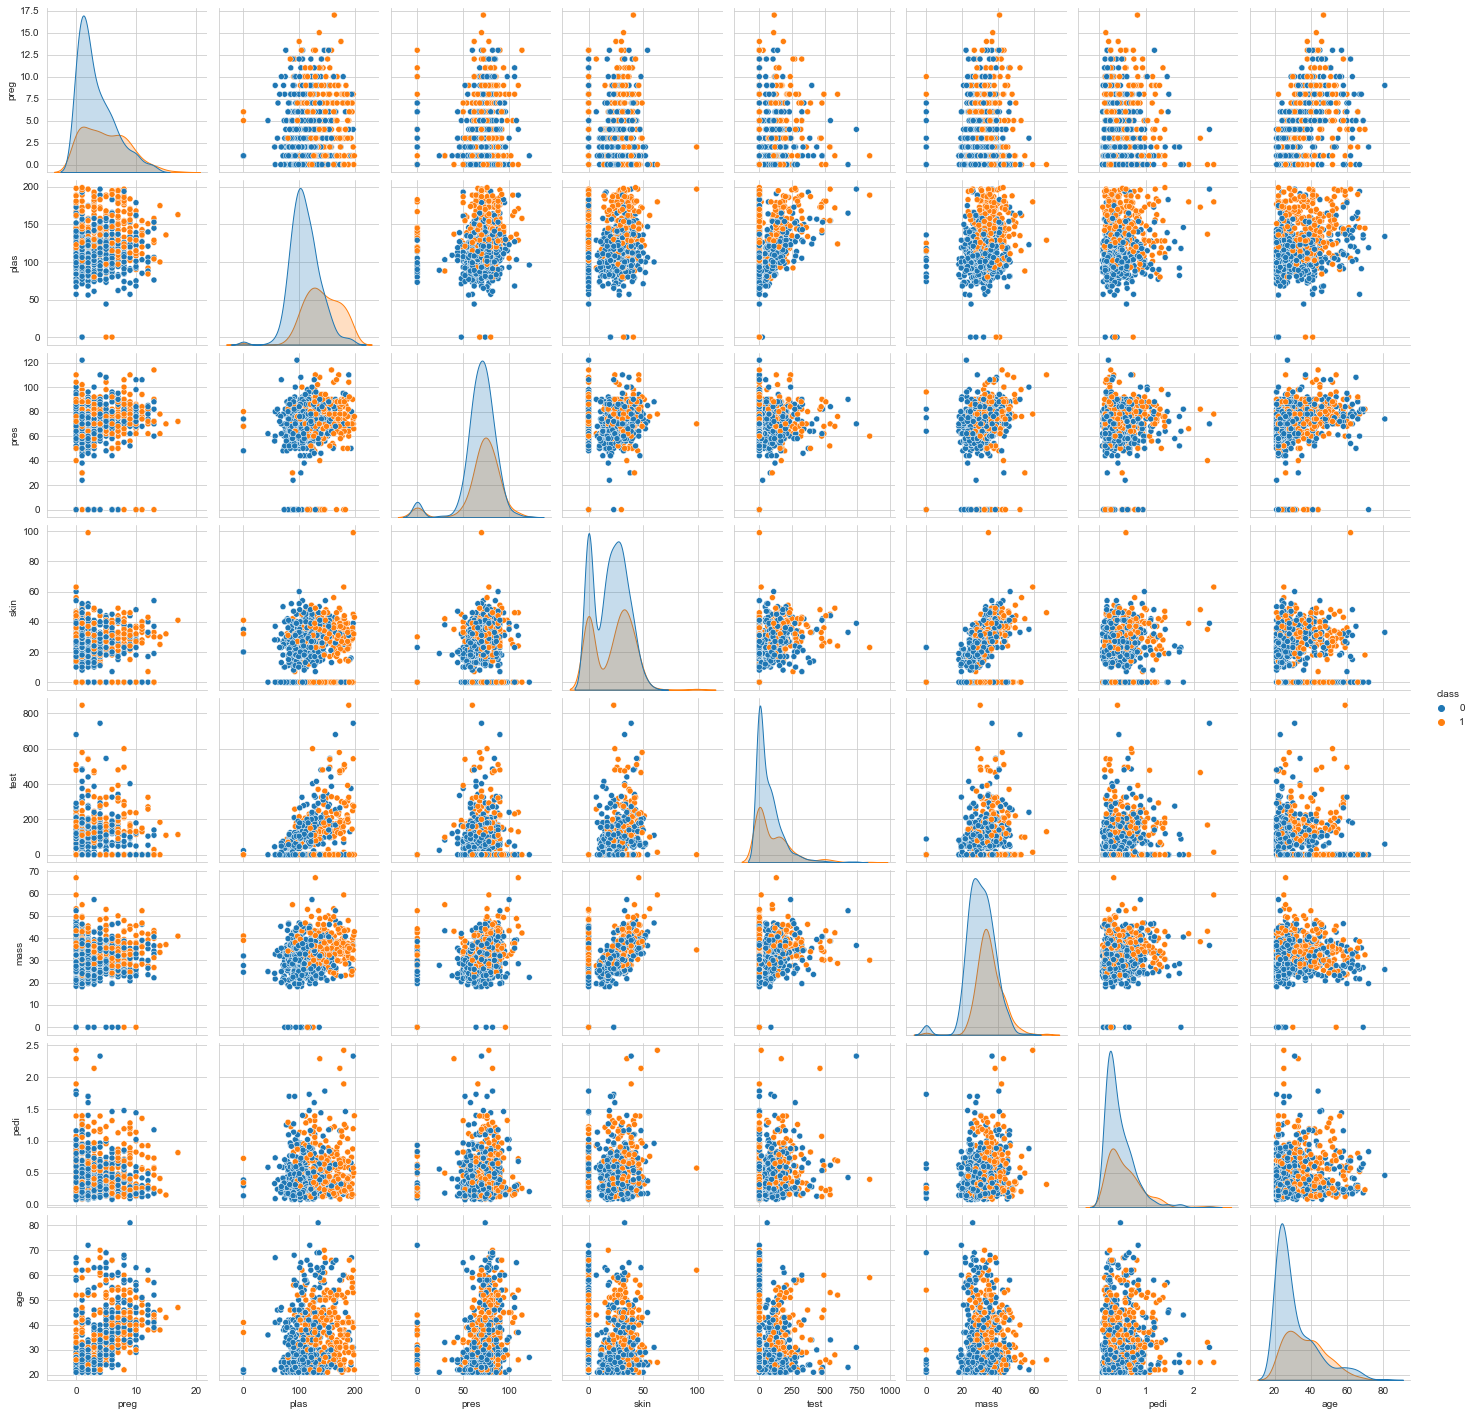

In [62]:
sns.pairplot(df,hue='class')

In [63]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [64]:
X=df.drop("class",axis=1)

In [65]:
y=df["class"]

In [66]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
predictions = logmodel.predict(X_test)

In [89]:
from sklearn.metrics import classification_report

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
print(accuracy_score(y_test,predictions))

0.7916666666666666


In [92]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       124
           1       0.74      0.63      0.68        68

    accuracy                           0.79       192
   macro avg       0.78      0.76      0.76       192
weighted avg       0.79      0.79      0.79       192



In [93]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[109  15]
 [ 25  43]]
